# 1. Import dataset and split into Attributes and Target

In [1]:
#Lib
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the input dataset
df = pd.read_csv('dataset_best_2862_3000.csv')
df.head(10)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC,Cost_[E/MWh],Congestion_[h],PeakLoad_[MW],MaxCurtailment_[MW],...,CurtailmentToRESGeneration_[%],TotalGeneration_[TWh],ShareResGeneration_[%],MaxLoadSheddingShare_[%],CF_gas,CF_nuc,CF_wat,CF_win,CF_sun,GAMS_error
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652,95.002971,342232.0,440929.412497,0.265669,...,17.570580,2988.845784,0.000048,0.0,0.203240,0.689348,0.247897,0.177179,0.129331,1
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749,706.110944,367563.0,440929.412497,0.389225,...,26.808339,2999.698390,0.000055,0.0,0.454996,0.825949,0.244089,0.157520,0.128098,0
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452,90.062284,372673.0,440929.412497,0.412014,...,28.569677,3089.038330,0.000066,0.0,0.113644,0.639707,0.245816,0.145467,0.112630,1
3,1.168674,0.513135,0.672458,0.131425,0.056598,0.109961,92.624826,356327.0,440929.412497,0.054575,...,2.635613,2909.707990,0.000021,0.0,0.195025,0.840115,0.242933,0.232125,0.132789,0
4,0.780587,0.558311,2.895860,0.391405,0.183363,0.288071,95.007263,330987.0,440929.412497,0.307098,...,16.582476,3060.614655,0.000052,0.0,0.201166,0.795364,0.257988,0.181468,0.129279,1
5,0.568655,0.622806,2.208519,0.171678,0.212573,0.082090,521.839272,378544.0,440929.412497,0.161052,...,4.773577,3068.697142,0.000037,0.0,0.512149,0.953839,0.250370,0.221810,0.131097,0
6,1.098779,0.308377,1.418885,0.118913,0.256489,0.006151,88.818971,408904.0,440929.412497,0.248101,...,10.901041,3077.622804,0.000037,0.0,0.145490,0.592008,0.232589,0.213308,0.120157,0
7,1.276510,0.271858,2.517624,0.012513,0.185300,0.725843,84.149104,258290.0,440929.412497,0.010813,...,0.007914,2980.014736,0.000023,0.0,0.033354,0.886180,0.258284,0.244838,0.134437,1
8,0.740493,0.813414,1.305634,0.400257,0.244999,0.101254,97.173299,369413.0,440929.412497,0.347698,...,22.370092,3076.435974,0.000058,0.0,0.322633,0.915669,0.243088,0.160626,0.121624,0
9,1.051327,0.673208,2.430025,0.397162,0.165809,0.538571,91.493834,283032.0,440929.412497,0.276499,...,12.355590,3040.427547,0.000051,0.0,0.096260,0.841697,0.259230,0.198282,0.131534,1


In [2]:
df.columns

Index(['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV',
       'rNTC', 'Cost_[E/MWh]', 'Congestion_[h]', 'PeakLoad_[MW]',
       'MaxCurtailment_[MW]', 'MaxLoadShedding_[MW]', 'Demand_[TWh]',
       'NetImports_[TWh]', 'Curtailment_[TWh]', 'Shedding_[MWh]',
       'LostLoad_[TWh]', 'MaxRESGeneration_[TWh]',
       'CurtailmentToRESGeneration_[%]', 'TotalGeneration_[TWh]',
       'ShareResGeneration_[%]', 'MaxLoadSheddingShare_[%]', 'CF_gas',
       'CF_nuc', 'CF_wat', 'CF_win', 'CF_sun', 'GAMS_error'],
      dtype='object')

In [3]:
df.shape

(2861, 27)

In [4]:
df_filtered = df[df['GAMS_error'] != 2]
df_filtered.shape

(2655, 27)

In [5]:
# Atributes X (features); labels y (target)

Dataset = df_filtered[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC','Curtailment_[TWh]', 'Shedding_[MWh]']]
y_curtail = Dataset['Curtailment_[TWh]']
y_shed = Dataset['Shedding_[MWh]']
X = Dataset[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC']]
X

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452
3,1.168674,0.513135,0.672458,0.131425,0.056598,0.109961
4,0.780587,0.558311,2.895860,0.391405,0.183363,0.288071
...,...,...,...,...,...,...
2855,0.906998,0.492762,1.301774,0.452141,0.024645,0.671601
2856,1.278408,0.728338,0.996340,0.085810,0.300380,0.504999
2857,0.979262,0.598873,1.599528,0.361362,0.046153,0.367896
2858,0.667955,0.461980,0.479170,0.127817,0.105495,0.565414


In [6]:
# Check for missing data in the target
### your code here
nan_values = Dataset.isnull().values.any()
if nan_values:
    print("There are NaN values in the input data.")
else:
    print("There are no NaN values in the input data.")

There are no NaN values in the input data.


In [7]:
# Correlations
correlation_matrix = Dataset.corr()
Corr_curtail = correlation_matrix['Curtailment_[TWh]']
print(Corr_curtail)

CapacityRatio       -0.088117
ShareFlex           -0.057562
ShareStorage        -0.069412
ShareWind            0.821606
SharePV              0.285197
rNTC                -0.257180
Curtailment_[TWh]    1.000000
Shedding_[MWh]       0.132845
Name: Curtailment_[TWh], dtype: float64


In [8]:
Corr_shed = correlation_matrix['Shedding_[MWh]']
print(Corr_shed)

CapacityRatio       -0.402016
ShareFlex           -0.017249
ShareStorage        -0.042498
ShareWind            0.140299
SharePV             -0.061406
rNTC                -0.204496
Curtailment_[TWh]    0.132845
Shedding_[MWh]       1.000000
Name: Shedding_[MWh], dtype: float64


# 2. SPLIT & SCALE- Target : LS

In [9]:
print(X.shape)
print(y_shed.shape)
print(type(X))
print(type(y_shed))

(2655, 6)
(2655,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
X.head(3)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452


In [11]:
from sklearn.model_selection import train_test_split
# 50% TRAIN 20% VAL 30% TEST
X_train, X_test, y_train, y_test = train_test_split(X, y_shed, test_size=0.3,random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de validation   :", len(X_val))
print("Taille de l'ensemble de test         :", len(X_test))

Taille de l'ensemble d'entraînement : 1337
Taille de l'ensemble de validation   : 521
Taille de l'ensemble de test         : 797


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_test_sc = scaler_X.transform(X_test)
X_val_sc = scaler_X.transform(X_val)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [14]:
type(y_train_scaled)
print(y_train_scaled)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.45759392e-01
 6.02964002e-05 0.00000000e+00]


# 3. Model Building - LS

In [32]:
""""
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Séparation des données en ensembles d'entraînement, validation et test
X_train, X_test, y_train, y_test = train_test_split(X, y_shed, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

# Normalisation des données
scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_val_sc = scaler_X.transform(X_val)
X_test_sc = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
#y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
#y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
#y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Variable binaire pour la classification (0 ou non-0)
y_train_binary = (y_train > 0).astype(int)
y_val_binary = (y_val > 0).astype(int)

# Pipeline pour le modèle de classification
clf_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), list(range(X_train_sc.shape[1])))
        ]
    )),
    ('classifier', RandomForestClassifier())
])

# Hyperparamètres pour GridSearchCV
clf_param_grid = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
}

# Recherche des meilleurs hyperparamètres pour la classification
my_cv = KFold(n_splits=10, shuffle=True)
clf_grid_search = GridSearchCV(clf_pipeline, clf_param_grid, cv=my_cv, scoring='accuracy')
clf_grid_search.fit(X_train_sc, y_train_binary)

print("Best parameters for classification:", clf_grid_search.best_params_)

# Prédictions de probabilité pour la classification
prob_non_zero = clf_grid_search.predict_proba(X_test_sc)[:, 1]

# Filtrer les données pour la régression (seulement les valeurs non nulles)
X_train_regression = X_train_sc[y_train > 0]
y_train_regression = y_train[y_train >0]

# Pipeline pour le modèle de régression
reg_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), list(range(X_train_sc.shape[1])))
        ]
    )),
    ('regressor', RandomForestRegressor())
])

# Hyperparamètres pour GridSearchCV
reg_param_grid = {
    'regressor__n_estimators': [750],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features':[None, 'sqrt', 'log2']
}

# Recherche des meilleurs hyperparamètres pour la régression
reg_grid_search = GridSearchCV(reg_pipeline, reg_param_grid, cv=my_cv, scoring='neg_mean_absolute_error')
reg_grid_search.fit(X_train_regression, y_train_regression)

print("Best parameters for regression:", reg_grid_search.best_params_)

# Prédictions de la régression pour les valeurs non nulles
predictions_regression = reg_grid_search.predict(X_test_sc)

# Combinaison des prédictions
predictions_combined = prob_non_zero * predictions_regression

# Inverser la transformation pour les prédictions
#predictions_original = scaler_y.inverse_transform(predictions_combined.reshape(-1, 1)).ravel()

# Évaluation des performance
mae = mean_absolute_error(y_test, predictions_combined)
print("Mean Absolute Error on validation set:", mae)


Best parameters for classification: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best parameters for regression: {'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 750}
Mean Absolute Error on validation set: 2006466.845504309


In [38]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 325.1 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 798.9 kB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
# Sur-échantillonnage manuel des cas non nuls

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y_shed, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

# Normalisation des caractéristiques
scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_val_sc = scaler_X.transform(X_val)
X_test_sc = scaler_X.transform(X_test)

# Transformation logarithmique de la variable cible pour atténuer l'effet des valeurs extrêmes
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

# Sur-échantillonnage manuel des cas non nuls
non_zero_indices = np.where(y_train_log > 0)[0]
num_samples_needed = len(y_train_log) - len(non_zero_indices)

if num_samples_needed > 0 and len(non_zero_indices) > 0:
    resampled_indices = np.random.choice(non_zero_indices, num_samples_needed, replace=True)
    X_train_resampled = np.vstack([X_train_sc, X_train_sc[resampled_indices]])
    y_train_resampled = np.hstack([y_train_log, y_train_log.iloc[resampled_indices]])
else:
    X_train_resampled = X_train_sc
    y_train_resampled = y_train_log

# Pipeline pour le modèle de régression
reg_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), list(range(X_train_sc.shape[1])))
        ]
    )),
    ('regressor', RandomForestRegressor())
])

# Hyperparamètres pour GridSearchCV
reg_param_grid = {
    'regressor__n_estimators': [100, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Recherche des meilleurs hyperparamètres pour la régression
my_cv = KFold(n_splits=5, shuffle=True, random_state=42)
reg_grid_search = GridSearchCV(reg_pipeline, reg_param_grid, cv=my_cv, scoring='neg_mean_absolute_error')
reg_grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters for regression:", reg_grid_search.best_params_)

# Prédictions de la régression sur les données de test
predictions_log = reg_grid_search.predict(X_test_sc)

# Inverser la transformation logarithmique
predictions = np.expm1(predictions_log)

# Évaluation des performances
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on test set:", mae)

Best parameters for regression: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Mean Absolute Error on test set: 2119287.6125211604


In [59]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y_shed, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

# Normalisation des caractéristiques
scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_val_sc = scaler_X.transform(X_val)
X_test_sc = scaler_X.transform(X_test)

# Transformation log sur la cible
y_train_log = np.log1p(y_train)

# Calcul des poids des échantillons
zero_indices = np.where(y_train_log == 0)[0]
non_zero_indices = np.where(y_train_log > 0)[0]

# Définir le poids pour les échantillons non nuls
weights = np.ones_like(y_train_log)  # Poids par défaut
weights[zero_indices] = 0.1  # Poids faible pour les valeurs nulles
weights[non_zero_indices] = 0.9  # Poids élevé pour les valeurs non nulles

# RandomForestRegressor - hyperparamètres
modelo = RandomForestRegressor()
params = {
    'n_estimators': [200, 500],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None],
    'bootstrap': [True, False]
}

# Validation croisée
my_cv = KFold(n_splits=10, shuffle=False)

# Création du GridSearchCV
grid_search_rf = GridSearchCV(estimator=modelo, param_grid=params, scoring='neg_mean_absolute_error', cv=my_cv)
grid_search_rf.fit(X_train_sc, y_train_log, sample_weight=weights)

# Meilleur modèle
best_rf = grid_search_rf.best_estimator_

# Affichage des résultats
print("Best result: %f using the following hyperparameters %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))
means = grid_search_rf.cv_results_['mean_test_score']
stds = grid_search_rf.cv_results_['std_test_score']
params = grid_search_rf.cv_results_['params']

# Évaluation sur l'ensemble de test
y_pred_log = best_rf.predict(X_test_sc)
y_pred = np.expm1(y_pred_log)  # Inverse log transformation
mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", mae)


Best result: 0.886847 using the following hyperparameters {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
MAE on test set: 2539267.789586614


In [62]:
# sur échnatillonage + ajustement des poids

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y_shed, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

# Normalisation des caractéristiques
scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_val_sc = scaler_X.transform(X_val)
X_test_sc = scaler_X.transform(X_test)

# Normalisation de la variable cible
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Sur-échantillonnage manuel des cas non nuls
non_zero_indices = np.where(y_train_scaled > 0)[0]
zero_indices = np.where(y_train_scaled == 0)[0]
num_zero_samples_needed = len(non_zero_indices) - len(zero_indices)

if num_zero_samples_needed > 0 and len(non_zero_indices) > 0:
    resampled_non_zero_indices = np.random.choice(non_zero_indices, num_zero_samples_needed, replace=True)
    X_train_resampled = np.vstack([X_train_sc, X_train_sc[resampled_non_zero_indices]])
    y_train_resampled = np.hstack([y_train_scaled, y_train_scaled[resampled_non_zero_indices]])
else:
    X_train_resampled = X_train_sc
    y_train_resampled = y_train_scaled

# Définir les poids d'échantillons
weights = np.where(y_train_scaled > 0, 0.9, 0.1)  # Ajuster le poids pour donner plus d'importance aux valeurs rares

# Pipeline pour le modèle de régression
reg_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), list(range(X_train_sc.shape[1])))
        ]
    )),
    ('regressor', RandomForestRegressor())
])

# Hyperparamètres pour GridSearchCV
reg_param_grid = {
    'regressor__n_estimators': [100, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Recherche des meilleurs hyperparamètres pour la régression
my_cv = KFold(n_splits=5, shuffle=True, random_state=42)
reg_grid_search = GridSearchCV(reg_pipeline, reg_param_grid, cv=my_cv, scoring='neg_mean_absolute_error')
reg_grid_search.fit(X_train_resampled, y_train_resampled, regressor__sample_weight=weights)

print("Best parameters for regression:", reg_grid_search.best_params_)

# Prédictions de la régression sur les données de test
predictions_scaled = reg_grid_search.predict(X_test_sc)

# Inverser la normalisation de la variable cible
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# Évaluation des performances
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on test set:", mae)


Best parameters for regression: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Mean Absolute Error on test set: 1852937.69613532


In [68]:
# juste ajustement des poids
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y_shed, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

# Normalisation des caractéristiques
scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_val_sc = scaler_X.transform(X_val)
X_test_sc = scaler_X.transform(X_test)

# Normalisation de la variable cible
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Ajuster les poids des échantillons
# Donner un poids plus élevé aux valeurs rares (non nulles)
weights = np.where(y_train_scaled > 0, 1, 0.1)  # Ajuste les poids : 1 pour non nul, 0.1 pour nul

# Pipeline pour le modèle de régression
reg_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), list(range(X_train_sc.shape[1])))
        ]
    )),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparamètres pour GridSearchCV
reg_param_grid = {
    'regressor__n_estimators': [100, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__bootstrap': [True, False]
}

# Recherche des meilleurs hyperparamètres pour la régression
my_cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(reg_pipeline, reg_param_grid, cv=my_cv, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train_sc, y_train_scaled, regressor__sample_weight=weights)

# Résultats de la recherche
print("Best parameters for Random Forest Regressor:", grid_search_rf.best_params_)

# Prédictions de la régression sur les données de test
predictions_scaled = grid_search_rf.predict(X_test_sc)

# Inverser la normalisation de la variable cible
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# Évaluation des performances
mae = mean_absolute_error(y_test_scaled, predictions_scaled)
print("Mean Absolute Error on test set:", mae)


Best parameters for Random Forest Regressor: {'regressor__bootstrap': True, 'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Mean Absolute Error on test set: 0.009118636448906276


In [29]:
print(len(X_train_regression))
print(len(X_train_sc))
print(y_train_binary)

277
1337
[0 0 0 ... 1 1 0]


In [16]:
# Revenir à l'échelle originale
y_predict_LS_rf_test_rescaled = scaler_y.inverse_transform(predictions_combined.reshape(-1, 1)).ravel()
y_test_rescaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

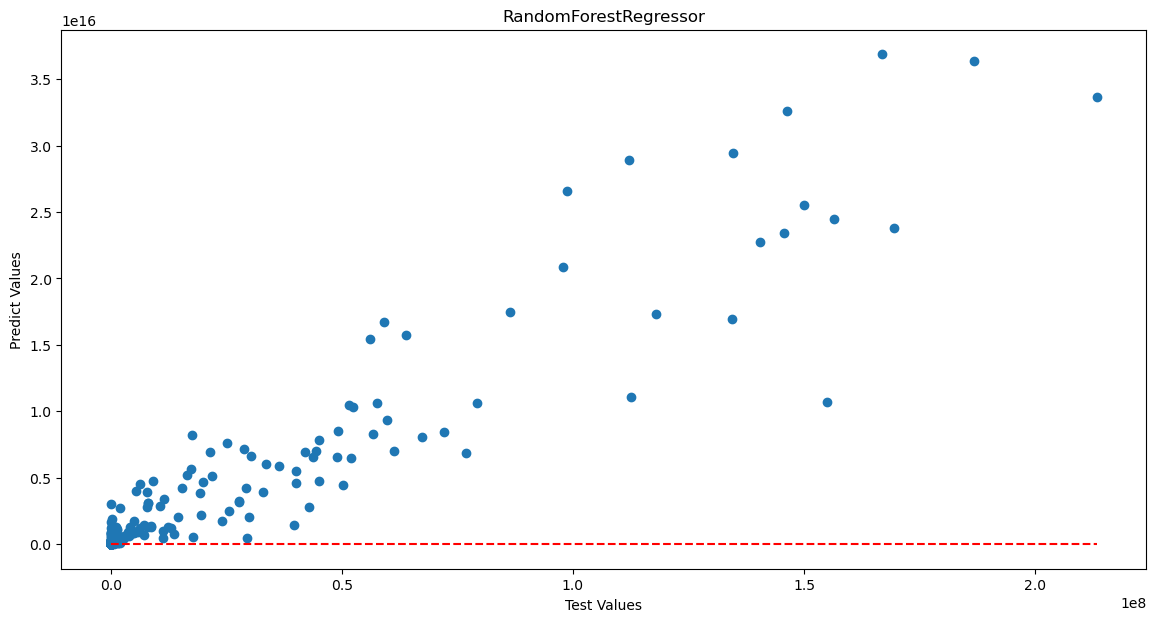

In [76]:
# Comparaison des valeurs prédites et réelles
plt.figure(figsize=(14, 7))

plt.scatter(y_test, predictions_original)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Test Values')
plt.ylabel('Predict Values')
plt.title('RandomForestRegressor')

plt.show()

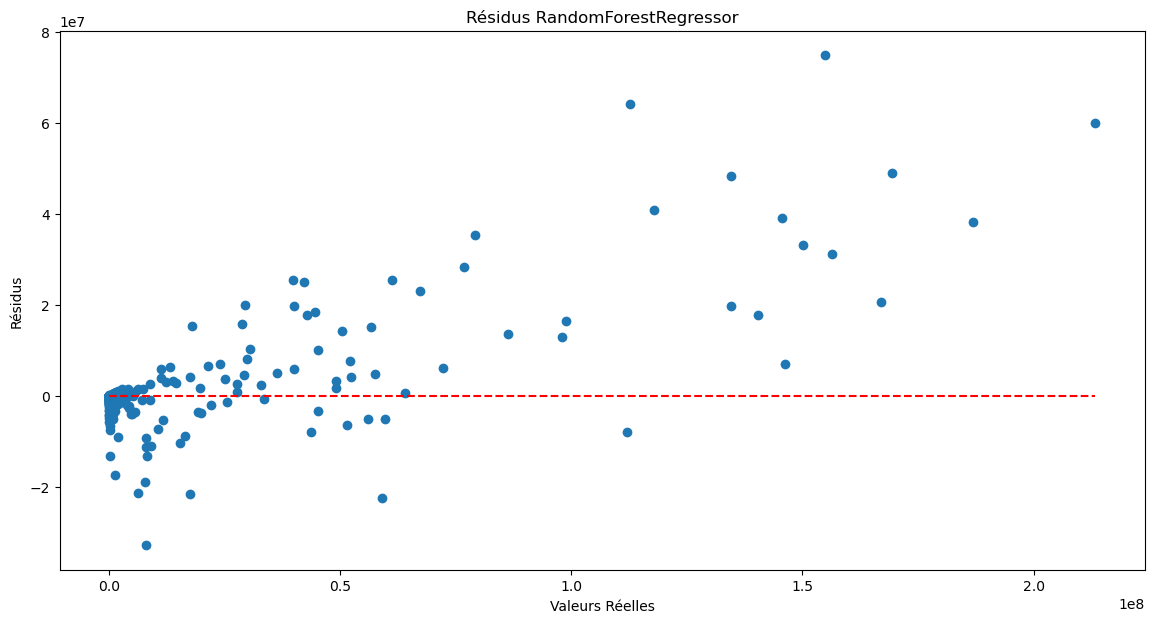

In [70]:
# Plotting the residuals
plt.figure(figsize=(14, 7))

residuals_rf = y_test - predictions
plt.scatter(y_test, residuals_rf)
plt.hlines(y=0, xmin=min(y_test_rescaled), xmax=max(y_test_rescaled), colors='r', linestyles='--')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Résidus')
plt.title('Résidus RandomForestRegressor')

plt.show()

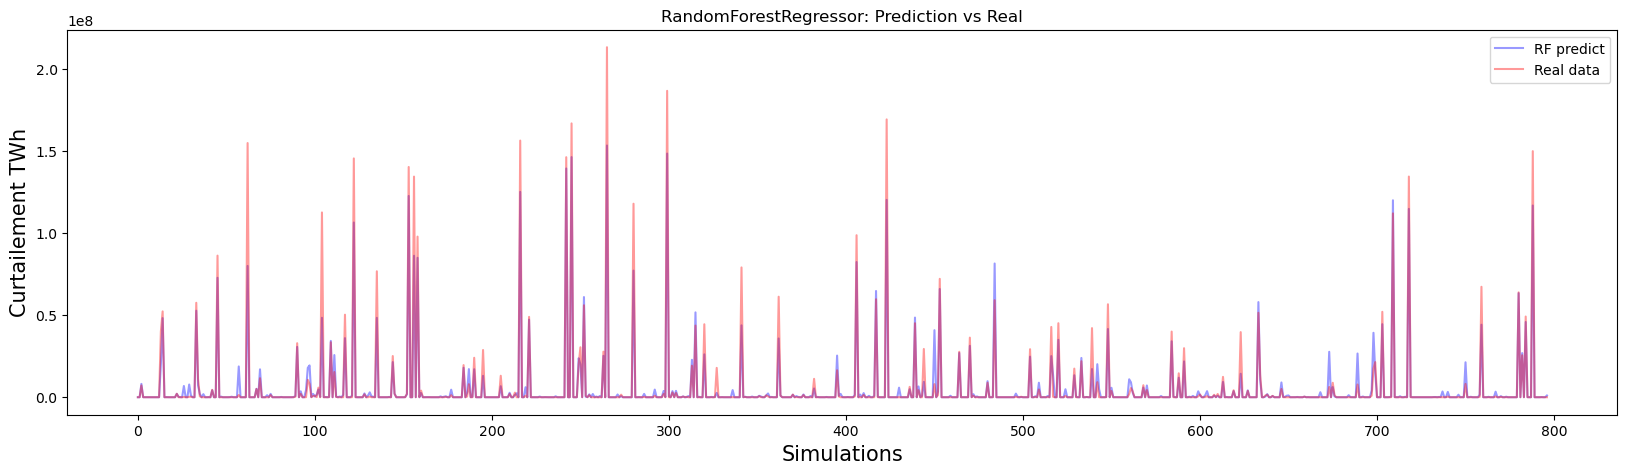

In [71]:
# Plot des résultats de RandomForestRegressor
x = range(len(predictions))
plt.figure(figsize=(20, 5))
plt.xlabel('Simulations', size=15)
plt.ylabel('Curtailement TWh', size=15)
plt.plot(x, predictions, alpha=0.4, color='blue', label='RF predict')
plt.plot(x, y_test, alpha=0.4, color='red', label='Real data')
plt.title('RandomForestRegressor: Prediction vs Real')
plt.legend()
plt.show()

In [ ]:
# Get feature importances
feature_names = ['CR', 'Share Flex.', 'Share Storage', 'Share Wind', 'Share PV', 'rNTC']
importances = best_rf.feature_importances_

# Sort the feature importances in descending order and get feature indices
indices = np.argsort(importances)[::-1]

# Print feature ranking with descriptive names
print("Feature ranking:")
for f in range(X_train_sc.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]:.4f})")

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train_sc.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_sc.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()  # Adjust layout to make room for feature names
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir les variables pour lesquelles vous voulez tracer les surfaces
wind_index = 3  # Indice de la première variable d'entrée
pv_index = 4  # Indice de la deuxième variable d'entrée

# Créer une grille de valeurs pour les deux variables d'entrée
x1_values = np.linspace(0, 1, 15)  # Valeurs pour la première variable d'entrée
x2_values = np.linspace(0, 1, 15)  # Valeurs pour la deuxième variable d'entrée
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)

# Préparer les données pour prédiction
static_values = np.full(225, 0.5) #np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])  # Valeurs statiques pour les 4 autres variables
chosen_values = np.full(225, 0.25)
chosen_values2 = np.full(225, 0.75)

input_data = np.column_stack((static_values, static_values, static_values, x1_mesh.flatten(), x2_mesh.flatten(), static_values))
#input_data

In [ ]:
# CR - rNTC with PV = 0.25
input_data = np.column_stack((x1_mesh.flatten(), static_values, static_values, static_values, chosen_values, x2_mesh.flatten()))

# Prédire avec le modèle entraîné
predictions = best_rf.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)

# Inverser la transformation des prédictions
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

# Créer une figure avec deux sous-graphiques côte à côte
fig = plt.figure(figsize=(20, 8))

# Sous-graphe 1 : Surface Plot en 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x1_mesh, x2_mesh, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('CR [%]')
ax1.set_ylabel('rNTC [%]')
ax1.set_zlabel('Load Shedding [MWh]')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
#ax1.set_title('3D Surface Plot')

# Sous-graphe 2 : Contour Plot
ax2 = fig.add_subplot(122)
contour_plot = ax2.contour(x1_mesh, x2_mesh, predictions_original, levels=20, cmap='viridis')
ax2.set_xlabel('CR [%]')
ax2.set_ylabel('rNTC [%]')
#ax2.set_title('Contour Plot of Output against Two Input Variables')
fig.colorbar(contour_plot, ax=ax2, label='Load Shedding [MWh]')

plt.tight_layout()
plt.show()

In [ ]:
# CR - rNTC with PV = 0.75
input_data = np.column_stack((x1_mesh.flatten(), static_values, static_values, static_values, chosen_values2, x2_mesh.flatten()))

# Prédire avec le modèle entraîné
predictions = best_rf.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)

# Inverser la transformation des prédictions
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

# Créer une figure avec deux sous-graphiques côte à côte
fig = plt.figure(figsize=(20, 8))

# Sous-graphe 1 : Surface Plot en 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x1_mesh, x2_mesh, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('CR [%]')
ax1.set_ylabel('rNTC [%]')
ax1.set_zlabel('Load Shedding [MWh]')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
#ax1.set_title('3D Surface Plot')

# Sous-graphe 2 : Contour Plot
ax2 = fig.add_subplot(122)
contour_plot = ax2.contour(x1_mesh, x2_mesh, predictions_original, levels=20, cmap='viridis')
ax2.set_xlabel('CR [%]')
ax2.set_ylabel('rNTC [%]')
#ax2.set_title('Contour Plot of Output against Two Input Variables')
fig.colorbar(contour_plot, ax=ax2, label='Load Shedding [MWh]')

plt.tight_layout()
plt.show()

In [ ]:
# CR - PV with PV = 0.5
input_data = np.column_stack((x1_mesh.flatten(), static_values, static_values, static_values, x2_mesh.flatten(), static_values ))

# Prédire avec le modèle entraîné
predictions = best_rf.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)

# Inverser la transformation des prédictions
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

# Créer une figure avec deux sous-graphiques côte à côte
fig = plt.figure(figsize=(20, 8))

# Sous-graphe 1 : Surface Plot en 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x1_mesh, x2_mesh, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('CR [%]')
ax1.set_ylabel('Share PV [%]')
ax1.set_zlabel('Load Shedding [MWh]')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
#ax1.set_title('3D Surface Plot')

# Sous-graphe 2 : Contour Plot
ax2 = fig.add_subplot(122)
contour_plot = ax2.contour(x1_mesh, x2_mesh, predictions_original, levels=20, cmap='viridis')
ax2.set_xlabel('CR [%]')
ax2.set_ylabel('Share PV [%]')
#ax2.set_title('Contour Plot of Output against Two Input Variables')
fig.colorbar(contour_plot, ax=ax2, label='Load Shedding [MWh]')

plt.tight_layout()
plt.show()

In [ ]:
# rNTC - PV with PV = 0.5
input_data = np.column_stack((static_values, static_values, static_values, static_values, x2_mesh.flatten(), x1_mesh.flatten() ))

# Prédire avec le modèle entraîné
predictions = best_rf.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)

# Inverser la transformation des prédictions
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

# Créer une figure avec deux sous-graphiques côte à côte
fig = plt.figure(figsize=(20, 8))

# Sous-graphe 1 : Surface Plot en 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x1_mesh, x2_mesh, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('rNTC [%]')
ax1.set_ylabel('Share PV [%]')
ax1.set_zlabel('Load Shedding [MWh]')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
#ax1.set_title('3D Surface Plot')

# Sous-graphe 2 : Contour Plot
ax2 = fig.add_subplot(122)
contour_plot = ax2.contour(x1_mesh, x2_mesh, predictions_original, levels=20, cmap='viridis')
ax2.set_xlabel('rNTC [%]')
ax2.set_ylabel('Share PV [%]')
#ax2.set_title('Contour Plot of Output against Two Input Variables')
fig.colorbar(contour_plot, ax=ax2, label='Load Shedding [MWh]')

plt.tight_layout()
plt.show()

In [ ]:
# Wind-rNTC with PV = 0.75
input_data = np.column_stack((x1_mesh.flatten(), x2_mesh.flatten(), static_values, static_values, static_values, static_values))

# Prédire avec le modèle entraîné
predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)

# Inverser la transformation des prédictions
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

# Créer une figure avec deux sous-graphiques côte à côte
fig = plt.figure(figsize=(20, 8))

# Sous-graphe 1 : Surface Plot en 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x1_mesh, x2_mesh, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('CR [%]')
ax1.set_ylabel('Share Flex. [%]')
ax1.set_zlabel('Curtailement [TWh]')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
#ax1.set_title('3D Surface Plot')

# Sous-graphe 2 : Contour Plot
ax2 = fig.add_subplot(122)
contour_plot = ax2.contour(x1_mesh, x2_mesh, predictions_original, levels=20, cmap='viridis')
ax2.set_xlabel('CR [%]')
ax2.set_ylabel('Share Flex. [%]')
#ax2.set_title('Contour Plot of Output against Two Input Variables')
fig.colorbar(contour_plot, ax=ax2, label='Curtailement [TWh]')

plt.tight_layout()
plt.show()

In [ ]:
""""
from sklearn.metrics import mean_squared_error

# Nombre d'itérations (époques)
num_iterations = 100

# Listes pour stocker les résultats
train_rmse_list = []
val_rmse_list = []

# Entraîner le modèle pour plusieurs itérations
for i in range(num_iterations):

    final_model.fit(X_train,y_curtail_train)  # Model training 
        
    # Faire des prédictions sur les ensembles d'entraînement et de validation
    y_train_pred_loss = final_model.predict(X_train)
    y_val_pred_loss = final_model.predict(X_val)

    # Calculer l'erreur quadratique moyenne (RMSE) pour chaque ensemble
    rmse_train = np.sqrt(mean_squared_error(y_curtail_train, y_train_pred_loss))
    rmse_val = np.sqrt(mean_squared_error(y_curtail_val, y_val_pred_loss))
    
    # Ajouter les résultats à la liste
    train_rmse_list.append(rmse_train)
    val_rmse_list.append(rmse_val)

# Tracer la performance (RMSE dans cet exemple) sur les époques
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), train_rmse_list, marker='o', linestyle='-', color='b', label='Training RMSE')
plt.plot(range(1, num_iterations + 1), val_rmse_list, marker='o', linestyle='-', color='r', label='Validation RMSE')
plt.title('Training and Validation RMSE over Iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.ylim(0, 0.5)  # Limite les valeurs de l'axe des y entre 0 et 0.5
#plt.xticks(range(1, num_iterations + 1))  # Définit les marques sur l'axe des x pour chaque itération
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

""""

In [ ]:
""""
# Réentraîner les modèles avec les hyperparamètres optimaux sur l'ensemble d'entraînement complet
X_train_complete = np.vstack((X_train_sc, X_val_sc))
y_train_complete = np.hstack((y_train_scaled, y_val_scaled))